In [1]:
!pip3 install nltk
import nltk
nltk.download('punkt')
nltk.download('stopwords')

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621


[nltk_data] Downloading package punkt to /Users/clara/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/clara/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
import pandas as pd
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords

# Data

In [3]:
data = pd.read_csv("data/ACL_data.csv").drop(columns = 'Unnamed: 0' )
data.head()

,YEAR,TITLE,ABSTRACT,PUBLISHER,BOOKTITLE,CATEGORY
0,2022,A Systematic Survey of Text Worlds as Embodied...,Text Worlds are virtual environments for embod...,Association for Computational Linguistics,Proceedings of the 3rd Wordplay: When Language...,INPROCEEDINGS
1,2022,A Minimal Computational Improviser Based on Or...,A prototype system for playing a minimal impro...,Association for Computational Linguistics,Proceedings of the 3rd Wordplay: When Language...,INPROCEEDINGS
2,2022,Craft an Iron Sword: Dynamically Generating In...,Non-Player Characters (NPCs) significantly enh...,Association for Computational Linguistics,Proceedings of the 3rd Wordplay: When Language...,INPROCEEDINGS
3,2022,A Sequence Modelling Approach to Question Answ...,Interactive Question Answering (IQA) requires ...,Association for Computational Linguistics,Proceedings of the 3rd Wordplay: When Language...,INPROCEEDINGS
4,2022,Automatic Exploration of Textual Environments ...,The purpose of this extended abstract is to di...,Association for Computational Linguistics,Proceedings of the 3rd Wordplay: When Language...,INPROCEEDINGS


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32352 entries, 0 to 32351
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   YEAR       32352 non-null  int64 
 1   TITLE      32352 non-null  object
 2   ABSTRACT   32246 non-null  object
 3   PUBLISHER  32352 non-null  object
 4   BOOKTITLE  32352 non-null  object
 5   CATEGORY   32352 non-null  object
dtypes: int64(1), object(5)
memory usage: 1.5+ MB


In [5]:
data.YEAR.value_counts()

2020    6574
2021    5774
2019    4315
2018    3363
2022    3054
2017    2495
2016    1778
2010     832
2014     819
2012     762
2008     735
2006     622
2004     201
2011     117
2015     107
2009     104
2002      88
2007      88
2005      88
2000      79
2003      64
2001      61
1998      51
1989      47
1993      43
1995      33
1997      31
1991      27
Name: YEAR, dtype: int64

In [6]:
from matplotlib import pyplot as plt
import numpy as np

In [7]:
len(data.YEAR.unique())

28

In [18]:
import pandas as pd
df_anno = data.groupby(pd.Grouper(key='YEAR')).agg({'TITLE':'count'}).reset_index()
df_anno['%_total']= df_anno['TITLE']/df_anno['TITLE'].sum()

In [19]:
df_anno.head()

,YEAR,TITLE,%_total
0,2022,3054,0.094399
1,2021,5774,0.178474
2,2020,6574,0.203202
3,2019,4315,0.133377
4,2018,3363,0.103950


In [20]:
import seaborn as sns

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]),
 [Text(0, 0, '1989'),
  Text(1, 0, '1991'),
  Text(2, 0, '1993'),
  Text(3, 0, '1995'),
  Text(4, 0, '1997'),
  Text(5, 0, '1998'),
  Text(6, 0, '2000'),
  Text(7, 0, '2001'),
  Text(8, 0, '2002'),
  Text(9, 0, '2003'),
  Text(10, 0, '2004'),
  Text(11, 0, '2005'),
  Text(12, 0, '2006'),
  Text(13, 0, '2007'),
  Text(14, 0, '2008'),
  Text(15, 0, '2009'),
  Text(16, 0, '2010'),
  Text(17, 0, '2011'),
  Text(18, 0, '2012'),
  Text(19, 0, '2014'),
  Text(20, 0, '2015'),
  Text(21, 0, '2016'),
  Text(22, 0, '2017'),
  Text(23, 0, '2018'),
  Text(24, 0, '2019'),
  Text(25, 0, '2020'),
  Text(26, 0, '2021'),
  Text(27, 0, '2022')])

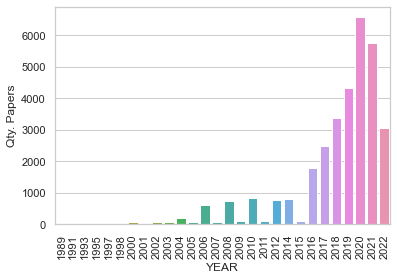

In [21]:
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="YEAR", y="TITLE", data=df_anno)
ax.set(xlabel='YEAR', ylabel='Qty. Papers')
plt.xticks(rotation=90)

In [24]:
df_anno[df_anno['YEAR']>2016].sum()

YEAR       12117.000000
TITLE      25575.000000
%_total        0.790523
dtype: float64

In [12]:
data.PUBLISHER.value_counts()

Association for Computational Linguistics                                                 21004
European Language Resources Association (ELRA)                                             4147
ATALA                                                                                      1375
European Language Resources Association                                                    1104
The COLING 2016 Organizing Committee                                                        739
International Committee on Computational Linguistics                                        654
INCOMA Ltd.                                                                                 573
Association for Machine Translation in the Americas                                         384
International Committee for Computational Linguistics                                       307
Asian Federation of Natural Language Processing                                             253
Chinese Information Processing Society o

In [13]:
data.CATEGORY.value_counts()

INPROCEEDINGS    32352
Name: CATEGORY, dtype: int64

## Cleaning and tokenize

In [99]:
# En este caso particular no hace falta limpiar los textos
def clean_text(text):
    if isinstance(text, pd.Series):
        return text.str.strip().values
    elif isinstance(text, str):
        return text.strip()

def tokenizer(text):
    #return [w for w in word_tokenize(text) if w.isalpha()] # si solo nos interesan palabras
    if isinstance(text, str):
        return word_tokenize(text)
    else:
        return text.apply(word_tokenize)



In [108]:
# word_tokenize(clean_text(data.ABSTRACT))
tokenizer(clean_text(data.ABSTRACT))


AttributeError: 'numpy.ndarray' object has no attribute 'apply'

In [ ]:
data.ABSTRACT.apply(word_tokenize)

In [ ]:
x = data.ABSTRACT.apply(word_tokenize)

In [ ]:
tokenizer(clean_text(data.ABSTRACT))#[:10]

La funcion anterior rompe con series y dataframes

In [92]:
print( type( clean_text( data.ABSTRACT[0]) ))
print( type(clean_text( data.ABSTRACT[:1]) ) )

# tokenizer(clean_text(data.ABSTRACT[:1] ))#[:10]

<class 'str'>
<class 'numpy.ndarray'>


In [ ]:
data.ABSTRACT[:1].values
# data.iloc[:1]

## Stoplist

In [ ]:
stoplist = stopwords.words("english")
stoplist[:15]

In [ ]:
stoplist_tokenized = []
for w in stoplist:
    stoplist_tokenized = stoplist_tokenized + tokenizer(w)
stoplist_tokenized[:15]